<a href="https://colab.research.google.com/github/dikoharyadhanto/Geemap_for_Python/blob/main/002_Creating_an_interactive_map_with_a_marker_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Libraries

In [1]:
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 57.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 KB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 KB 10.

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 75.2 MB/s eta 0:00:00


#Import Library

In [22]:
import geemap
import json
import os
import requests
from geemap import geojson_to_ee, ee_to_geojson
from ipyleaflet import GeoJSON, Marker, MarkerCluster
import geopandas as gpd
import zipfile
import shapefile
from json import dumps

# Access the Shapefile Data (Point)

In [10]:
#Extract Dataset ZIP
zip_ref = zipfile.ZipFile("/content/UMKM_SHP.zip", 'r')
zip_ref.extractall("/tmp/UMKM_SHP")
zip_ref.close()

In [11]:
url = '/tmp/UMKM_SHP/UMKM_SHP/UMKM.shp'

In [13]:
# Upload the shapefile you need to used first then read it with geopandas
shapefile = gpd.read_file(url)
shapefile.head()

GIS_IDR       IDR             Kota           Kec Jenis_Usah IDR_Resp  \
0   05146  05371146    Jakarta Barat     Kalideres    Kuliner      146   
1   03023  03151023    Jakarta Timur        Cakung    Kuliner      023   
2   03289  03152289    Jakarta Timur        Cakung    Fashion      289   
3   04077  04311077  Jakarta Selatan  Pasar Minggu    Kuliner      077   
4   05018  05353018    Jakarta Barat    Cengkareng      Craft      018   

  Kode_Pewaw Kode_AsSur Kode_AsPun Kode_Punch  ... BM02 BM03A BM03B BM03C  \
0         33          1          1         61  ...  0.0   0.0   0.0   0.0   
1         27          1          2         54  ...  1.0   3.0   1.0   3.0   
2         29          1          1         55  ...  0.0   0.0   0.0   0.0   
3         20          2          2         48  ...  0.0   0.0   0.0   0.0   
4         31          1          1         49  ...  0.0   0.0   0.0   0.0   

  BM03D BM03E BM03F BM03V  BM03Lain                                  geometry  
0   0.0   0.0   0.0   0.0       NaN  POINT Z (11878093.191 -686199.717 0.000)  
1   3.0   3.0   3.0   3.0       NaN  POINT Z (11905491.968 -691507.670 0.000)  
2   0.0   0.0   0.0   0.0       NaN  POINT Z (11903890.927 -691274.472 0.000)  
3   0.0   0.0   0.0   0.0       NaN  POINT Z (11893363.409 -702113.564 0.000)  
4   0.0   0.0   0.0   0.0       NaN  POINT Z (11880641.462 -685787.633 0.000)  

[5 rows x 115 columns]

<Axes: >

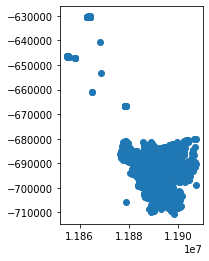

In [15]:
#plot shapefile
shapefile.plot()

#Projection

## Check Current Projection

In [16]:
#Checking the current projections
current_crs = shapefile.crs
current_crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

##Reprojection

<Axes: >

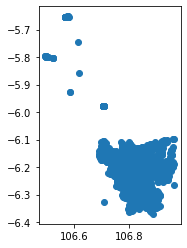

In [17]:
#change current projection to epsg:4236 because ipyflet only show spatial data with that projection
shapefile.to_crs(epsg=4326, inplace=True) #check into https://epsg.io/
shapefile.plot()

In [18]:
shapefile.head()

GIS_IDR       IDR             Kota           Kec Jenis_Usah IDR_Resp  \
0   05146  05371146    Jakarta Barat     Kalideres    Kuliner      146   
1   03023  03151023    Jakarta Timur        Cakung    Kuliner      023   
2   03289  03152289    Jakarta Timur        Cakung    Fashion      289   
3   04077  04311077  Jakarta Selatan  Pasar Minggu    Kuliner      077   
4   05018  05353018    Jakarta Barat    Cengkareng      Craft      018   

  Kode_Pewaw Kode_AsSur Kode_AsPun Kode_Punch  ... BM02 BM03A BM03B BM03C  \
0         33          1          1         61  ...  0.0   0.0   0.0   0.0   
1         27          1          2         54  ...  1.0   3.0   1.0   3.0   
2         29          1          1         55  ...  0.0   0.0   0.0   0.0   
3         20          2          2         48  ...  0.0   0.0   0.0   0.0   
4         31          1          1         49  ...  0.0   0.0   0.0   0.0   

  BM03D BM03E BM03F BM03V  BM03Lain                              geometry  
0   0.0   0.0   0.0   0.0       NaN  POINT Z (106.70273 -6.15238 0.00000)  
1   3.0   3.0   3.0   3.0       NaN  POINT Z (106.94885 -6.19979 0.00000)  
2   0.0   0.0   0.0   0.0       NaN  POINT Z (106.93447 -6.19770 0.00000)  
3   0.0   0.0   0.0   0.0       NaN  POINT Z (106.83990 -6.29449 0.00000)  
4   0.0   0.0   0.0   0.0       NaN  POINT Z (106.72562 -6.14870 0.00000)  

[5 rows x 115 columns]

##Save Shapefile after Reprojection

In [19]:
ESRI_WKT = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'

In [21]:
#save file into shapefile
shapefile.to_file(filename='UMKM2.shp', 
                    driver='ESRI Shapefile',
                    crs=ESRI_WKT)

#Convert Shapefile into GeoJSON

In [23]:
# read the shapefile
reader = shapefile.Reader("UMKM2.shp")
fields = reader.fields[1:]
field_names = [field[0] for field in fields]
buffer = []
for sr in reader.shapeRecords():
    atr = dict(zip(field_names, sr.record))
    geom = sr.shape.__geo_interface__
    buffer.append(dict(type="Feature", \
    geometry=geom, properties=atr)) 
   
# write the GeoJSON file  
geojson = open("UMKM.json", "w")
geojson.write(dumps({"type": "FeatureCollection", "features": buffer}, indent=2) + "\n")
geojson.close()

#Accessing GeoJSON Data

In [24]:
# open geojson data
with open('/content/UMKM.json') as f:
    geojson_data = json.load(f)

In [25]:
#Check geojson data
geojson_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [106.70272660030643, -6.152379600187357]},
   'properties': {'GIS_IDR': '05146',
    'IDR': '05371146',
    'Kota': 'Jakarta Barat',
    'Kec': 'Kalideres',
    'Jenis_Usah': 'Kuliner',
    'IDR_Resp': '146',
    'Kode_Pewaw': '33',
    'Kode_AsSur': '1',
    'Kode_AsPun': '1',
    'Kode_Punch': '61',
    'Nama_Resp': 'Heryadi',
    'Tanggal': '08/27/2022',
    'KL_01': 'Jakarta Barat',
    'KL_02': 'Kalideres',
    'KL_04': 'JL. PETA SELATAN N0. 18 RT 008 RW 001 KELURAHAN KALIDERES',
    'KR01': '3173060704630006',
    'KR02': '',
    'KR03': '1. KTP DKI tinggal di DKI',
    'KR04A': 31.0,
    'KR04B': 37.0,
    'KR04D': 'JL. PETA SELATAN N0. 18 RT 008 RW 001',
    'KR05': 59.0,
    'KR06': '1. Laki-laki',
    'KR07': '2. Kawin',
    'KR08': '5. SMA/MA/Sederajat',
    'KR09_A': 31.0,
    'KR09_B': 73.0,
    'KR10_A': 31.0,
    'KR10_B': 73.0,
    'KR11': '96. Tdk berlaku

In [26]:
#check coordinate in geojson data
for feature in geojson_data['features']:
  print((feature['geometry']['coordinates'][::-1]))

[-6.152379600187357, 106.70272660030643]
[-6.199785000115571, 106.94885399996261]
[-6.197702400109863, 106.93447160036136]
[-6.294493600392604, 106.83990129982386]
[-6.148699100281394, 106.72561810009539]
[-6.199972200034438, 106.79460470024307]
[-6.188365700039455, 106.86639939983293]
[-6.1561393001556475, 106.85237019983505]
[-6.164373199822243, 106.86069480043643]
[-6.2023650998986675, 106.78829960043532]
[-6.19293779968856, 106.8466000997796]
[-6.206293000006075, 106.81191510012246]
[-6.199762900418467, 106.81517379990103]
[-6.188706100313018, 106.8173760000571]
[-6.214031700380449, 106.81325169984044]
[-6.1971611998265, 106.81229290008991]
[-6.109675600441658, 106.9187911001402]
[-6.096446300197702, 106.96433820032787]
[-6.100328300173236, 106.9379453999381]
[-6.110146500257258, 106.92958580007495]
[-6.155158200263277, 106.95718940011034]
[-6.165565099929029, 106.89870660025554]
[-6.176270200214106, 106.9069829999537]
[-6.153792499666306, 106.91722939968001]
[-6.1299699997947785, 

#Create Marker Cluster

In [27]:
#show geemap layer
Map = geemap.Map()
Map

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=Bfq4H3vq8IqZSqVtfhj288aMw0xgdvx5VhMUNEOxM34&tc=0B8iUNf1Kt8Q1OzH-CYIfvFl4b123cjW3QYkRvsl7LY&cc=AUDwouy8aVSs0Z10aNKCjw7mEtMqahy-Sb3IfnV1IAs

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AVHEtk6tQdsx6u_ISb0ACASvx7y9ANNrnhnOPqFPAXhV1qWxVeWlvo24Qqg

Successfully saved authorization token.


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [28]:
#Create marker cluster
marker_cluster = MarkerCluster(
    markers=[Marker(location=feature['geometry']['coordinates'][::-1])
    for feature in geojson_data['features']],
    name='Markers',
)
    

In [29]:
#check marker cluster
print(marker_cluster)

MarkerCluster(markers=(Marker(location=[-6.152379600187357, 106.70272660030643], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_offset']), Marker(location=[-6.199785000115571, 106.94885399996261], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_offset']), Marker(location=[-6.197702400109863, 106.93447160036136], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_offset']), Marker(location=[-6.294493600392604, 106.83990129982386], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_offset']), Marker(location=[-6.148699100281394, 106.72561810009539], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_off

In [30]:
#Input Marker Cluster into geemap Layer
Map.add_layer(marker_cluster)

In [31]:
#Input Geojson Data (Point) into geemap layer with ee conversion
ee_fc = geojson_to_ee(geojson_data)
Map.addLayer(ee_fc, {}, "UMKM")